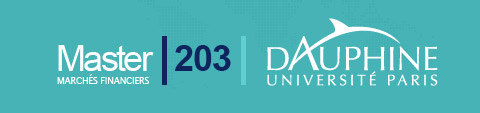

## LAB 2 rules

Assignment has to be done individually. Grades are between 0-20. The assignment counts for 50% of the final grade. You will be asked to build a whole machine learning pipeline and submit your predictions through the ENS data challenge interface. You will also have to submit your final notebook and relevant documents with regards to the following planning.

- **Competition start date** : 23 February 2023 15:30
- **Submissions dead line** : 28 March 2023, 00:59
- **Work and notebook submission** : 05 April 2023, 23:59

Final work submissions are made by email at vienne.thibaud@gmail.com. Zip your whole project with underlying folders, notebook and possible report. Email subject should start with [203_lab2].

## Grades

Your work will be marked out of 20 according to 2 criteria :

- **Criteria 1 : Predictive model performance and ranking on ENS data challenge leaderboard ( / 6 points).**<br/>
- **Criteria 2 : Relevance of the reported notebook ( / 11 points).**<br/>
- **Criteria 3 : code quality and participation on the forum ( / 3 points).**<br/>

First criteria grade will be a mixture between your predictive model performance on the competition interface and your competition ranking. Criteria 2 refers to the submitted work relevance. At least you should provide a commented notebook but feel free to provide a small report. More precisely, second criteria grades will be assigned with regards to the following points : 

**Data exploration and features engineering ( / 7 pts)** : 

> - Richness of exploration, analysis and charts provided.<br/>
> - Relevance of interpretations and justifications provided.<br/>
> - Relevance of implemented features, justifications and interpretations in data cleaning and features engineering.
> - Personal initiatives.<br/>
> - Your conclusions for the following steps.<br/>

**Machine learning pipeline ( / 4 pts)** : 
> - Relevance of implemented features, justifications and interpretations in machine learning algorithms.
> - Relevance in the chosen model evaluation procedure, results and models diagnostic.
> - Personal initiatives.
> - Your conclusions.

**Code quality and participation ( / 3 pts)** : 

> - Code clearness (structure of code, comments, written functions…)
> - Notebook clearness (structure of notebook, markdown...).
> - Participation on the forum.
> - ...

## Notebook description

This notebook will be used during the first 3 inclass hours of the competition. Using it, we will try to create a first supervised machine learning model to predict **electricity price variations**. Moreover, this notebook also aims to provide a machine pipeline you can use to structure your work and so success this lab. It is composed of the common machine learning steps :

**Step 0 - Prerequisites** : all your prerequisites including python modules to import and your own functions. It also covers competition purpose and the data description.<br/><br/>
**Step 1 - Exploration** : In this section, you will import datasets, discover available features, provide some data mining observations, investigate missing values and possible outliers. You can also try to explore the dynamics behing the modelization. An exhaustive exploration is more likely to yield powerful predictive models.<br/><br/>
**Step 2 - Features Engineering** : According to conclusions you get from exploration, you will process the provided data (cleaning, create new features, features selection...).<br/><br/>
**Step 3 - Machine learning experiments** : In this part, you will test different machine learning algorithms and configurations. It is your sandbox before running the final machine learning model. You will also have to evaluate your results and interpret it.<br/><br/>
**Step 4 - Final run** : According to the previous steps results and your own interpretation, run your best machine learning algorithm and make predictions for the test set. Then export your results and make a submission on the ENS data challenge platform. Conclude.<br/><br/>

## How to success this lab?

- Be organized. Work on a regular basis. The lab 2 requires time to yield good results.
- Take time to explore data. It will help you to understand features and reach better scores.
- Ask yourself questions. Be critical with results you get.
- Diversify efforts on all parts of machine learning pipeline (exploration, cleaning, features engineering/selection, machine learning...).
- Take initiatives. Try and test ! 
- Keep trusting in yourself ! you have all the needed knowledge to success this assignement. :)

# Step 0 - Prerequisites 

## Aim of the competition

The objective is to model the price of electricity from meteorological, energy (raw materials) and commercial data for two European countries - France and Germany. It should be emphasized that this is a problem of explaining prices by other concomitant variables and not a problem of prediction.

See more here : https://challengedata.ens.fr/participants/challenges/97/

## Classification metrics and submission format

For this competiton, the predictions will be scored using the **Spearman Rank correlation**.

## Load modules

In this cell, you can put all modules you use. You can use it to provide a clear code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Your functions

In order to have a clear code, you can put all your own functions in this cell.

In [2]:
def export_ens(df_test, pred_test, save=True, path_save="y_test_prediction.csv"):
    """
    Export submissions with the good ENS data challenge format.
    df_test : (pandas dataframe) test set
    proba_test : (numpy ndarray) prediction as a numpy ndarray you get using method .predict()
    save : (bool) if set to True, it will save csv submission in path_save path.
    path_save : (str) path where to save submission.
    return : dataframe for submission
    """
    df_submit = pd.Series(pred_test, index=df_test.index, name="TARGET")
    df_submit.to_csv(path_save, index=True)
    return df_submit

def check_test(result, expected, display_error):
    """
    Testing your results.
    """
    if result == expected:
        print("1 test passed.")
    else:
        print(display_error)

# Step 1 - Data Exploration

Data exploration is a common part in a machine learning pipeline. In this section, you will import datasets, discover  features, provide data mining observations, investigate missing values and possible outliers. An exhaustive exploration is more likely to yield prowerful predictive models.

- Read the train dataset inputs and assign to the variable **df_train**.
- Read the train dataset labels and assign to the variable **df_y_train**.
- Read the test dataset inputs and assign to the variable **df_test**.
- Assign number of rows in train dataset and assign it to variable **n_rows_train**.
- Assign number of rows in test dataset and assign it to variable **n_rows_test**.

## Load datasets

In [3]:
df_train = pd.read_csv(r"C:\Users\elaar\OneDrive\Bureau\COURS\Dauphine Master 203\M2\2nd semester\ML\lab2\data\X_train_NHkHMNU.csv")
df_y_train = pd.read_csv(r"C:\Users\elaar\OneDrive\Bureau\COURS\Dauphine Master 203\M2\2nd semester\ML\lab2\data\y_train_ZAN5mwg.csv")
df_test = pd.read_csv(r"C:\Users\elaar\OneDrive\Bureau\COURS\Dauphine Master 203\M2\2nd semester\ML\lab2\data\X_test_final.csv")
n_rows_train = len(df_train)
n_rows_test = len(df_test)

In [4]:
check_test(n_rows_train, 1494, "wrong number of rows")
check_test(n_rows_test, 654, "wrong number of rows")

1 test passed.
1 test passed.


## Take a look on first rows

Take a look on the **df_train** first 5 rows using method .head().

In [5]:
df_train.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378


Take a look on the **training targets** first 5 rows using method .head().

In [6]:
df_y_train.head()

,ID,TARGET
0,1054,0.028313
1,2049,-0.112516
2,1924,-0.180840
3,297,-0.260356
4,1101,-0.071733


## Set ID as index

the column **ID** is the identifier of the observations. Let's set the column **ID** as the index of the dataframe with the method **set_index()**.

- Set the column **ID** as the index of **df_train**.
- Set the column **ID** as the index of **df_y_train**. Select only the column "TARGET" and assign the result to **y_train**.
- Set the column **ID** as the index of **df_test**.

In [7]:
df_train = df_train.set_index("ID")
df_y_train = df_y_train.set_index("ID")["TARGET"]
#df_y_train = df_y_train.set_index("ID")
df_test = df_test.set_index("ID")

In [8]:
check_test(df_train.shape[1], 34, "wrong number of columns")
check_test(df_y_train.shape, (1494,), "wrong number of columns")

1 test passed.
1 test passed.


In [9]:
df_y_train

ID
1054    0.028313
2049   -0.112516
1924   -0.180840
297    -0.260356
1101   -0.071733
          ...   
459    -0.172597
1674   -0.063546
748     0.151797
1454   -0.640917
359    -0.252764
Name: TARGET, Length: 1494, dtype: float64

## Look at the distribution of the target

Let's take a look on the column label (Target) in the train dataset. Take a look on the disribution of the label by plotting an histogram with matplotlib.

- Plot the histogram of the serie **df_y_train**. You can use the parameter **bins** to change the number of slots.
- Describe the serie **df_y_train** using the method **.describe()**.

<span style="color:green">**=> Exemple : your interpretation may go here.** </span>.

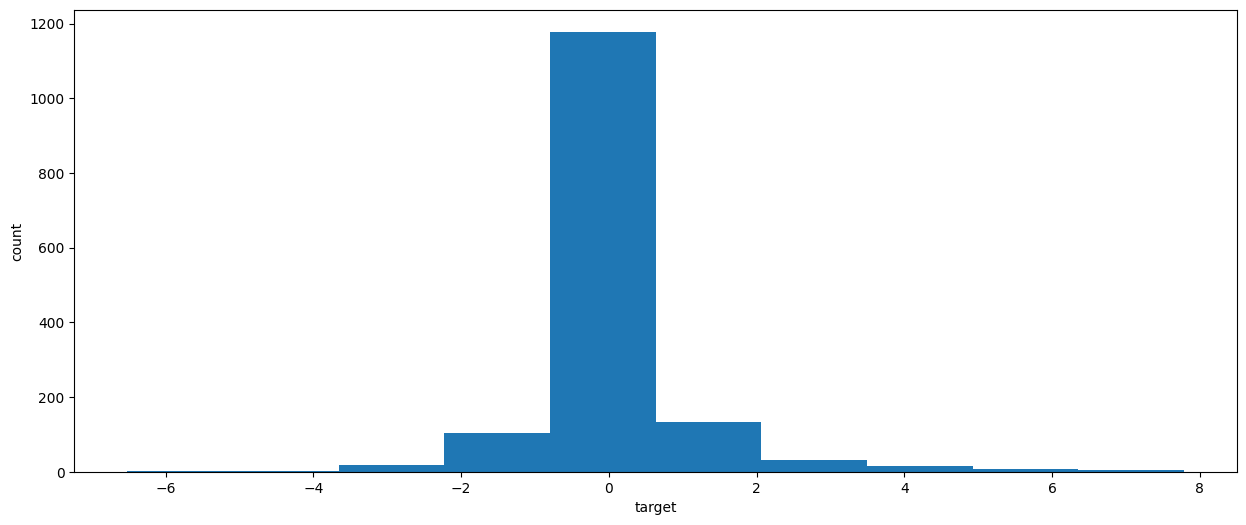

count    1494.000000
mean        0.089934
std         1.034582
min        -6.519268
25%        -0.219861
50%         0.000000
75%         0.269719
max         7.786578
Name: TARGET, dtype: float64


In [11]:
# Plot the histogram
plt.figure(figsize=[15, 6])
#plt.hist(df_y_train.TARGET)
plt.hist(df_y_train)
plt.xlabel("target")
plt.ylabel("count")
plt.show()

# Describe the serie of label with the method .describe()
print(df_y_train.describe())

In [148]:
df_train.columns

Index(['DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET'],
      dtype='object')

In [55]:
x_train = df_train[['COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET']]
x_train['y'] = df_y_train.TARGET

#x_test = df_test

x_train.replace('FR',0,inplace=True)
x_train.replace('DE',1,inplace=True)



regression -> lineaire first -> check residuals -> si mean autour de 0 -> linear regression suffisantes
sinon quadratic regression -> check residuals -> comme avant + augmente l'ordre si condition pas vraie

In [56]:
# For each column, fill with defaut value 0.
for col in x_train.columns.tolist():
    x_train[col] = x_train[col].fillna(0)
    #x[col] =  df_test[col].fillna(0)

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

clf = LinearRegression()
model = clf.fit(x_train, df_y_train.TARGET)
pred_train = model.predict(x_train)
pred_train = pd.Series(pred_train, index=df_y_train.TARGET.index)
pred_val = cross_val_predict(clf, x_train, df_y_train.TARGET)
pred_val = pd.Series(pred_val, index=df_y_train.TARGET.index)

#Create the linear regression X matrix
xmatrix_first = np.ones_like(x_train) #Constant term
xmatrix_last = x_train**2 #Square term
#Add in the linear term
xmatrix = np.concatenate((xmatrix_first,x_train,xmatrix_last),axis=1)

resid = df_y_train-np.squeeze(x_train)
ysquared = np.squeeze(x_train**2) + 2*resid

import sklearn.model_selection as skcv
cv = skcv.KFold(n_splits=6,shuffle=True)
y_cv = skcv.cross_val_predict(clf,xmatrix[:,1:],y=ysquared,cv=cv)


In [98]:
xmatrix_last

,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,y
ID,,,,,,,,,,,,,,,,,,,,,
1054,0,0.044141,0.182721,0.367871,0.367871,0.000000,0.480054,0.000000,0.480054,0.194691,...,0.029818,0.309531,0.625402,0.080180,1.142910,0.004020,0.114949,0.015513,0.000006,0.000802
2049,0,0.000502,1.006917,0.000487,0.000487,0.328925,1.278794,0.328925,1.278794,0.030546,...,1.538343,0.593604,2.317491,0.686266,0.191335,3.353443,0.434401,0.002220,0.240458,0.012660
1924,0,1.946123,3.915117,1.043064,1.043064,0.386910,2.831098,0.386910,2.831098,5.531497,...,0.231073,0.098181,0.185877,0.237761,0.469067,0.013187,0.287269,0.552551,0.042005,0.032703
297,1,0.966926,0.721137,0.704905,0.704905,0.073370,0.317228,0.073370,0.317228,0.237967,...,1.242863,0.257628,0.249410,0.055813,0.123157,0.174318,0.831110,0.087716,1.153364,0.067785
1101,0,0.020681,0.380735,0.855606,0.855606,0.000000,0.980741,0.000000,0.980741,0.056974,...,0.293185,0.180242,1.184088,1.023253,0.377412,0.532163,0.060078,2.330525,6.834972,0.005146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,1,2.338465,1.224746,3.442238,3.442238,0.047812,2.103735,0.047812,2.103735,3.278506,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.769101,0.671612,1.743384,0.029790
1674,0,2.619807,3.072447,0.373800,0.373800,0.201739,0.023148,0.201739,0.023148,3.891856,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.869804,0.007343,0.126989,0.004038
748,1,0.733420,0.239315,0.065422,0.065422,2.345627,0.688184,2.345627,0.688184,4.446886,...,0.043224,0.163833,0.353544,0.799255,0.065709,0.161858,1.238543,0.056565,0.004509,0.023042


<AxesSubplot: >

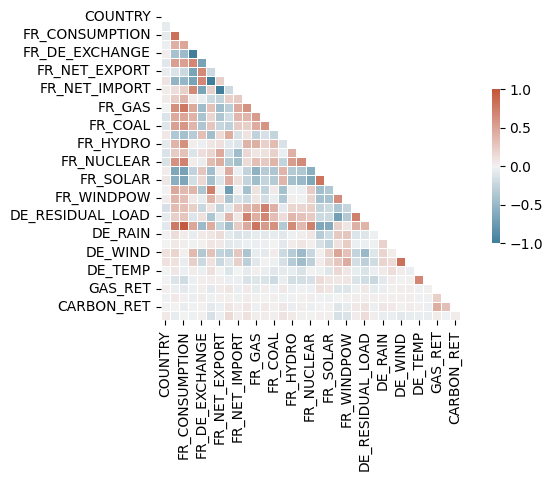

In [102]:
#heat map
# Compute the correlation matrix
corr = x_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

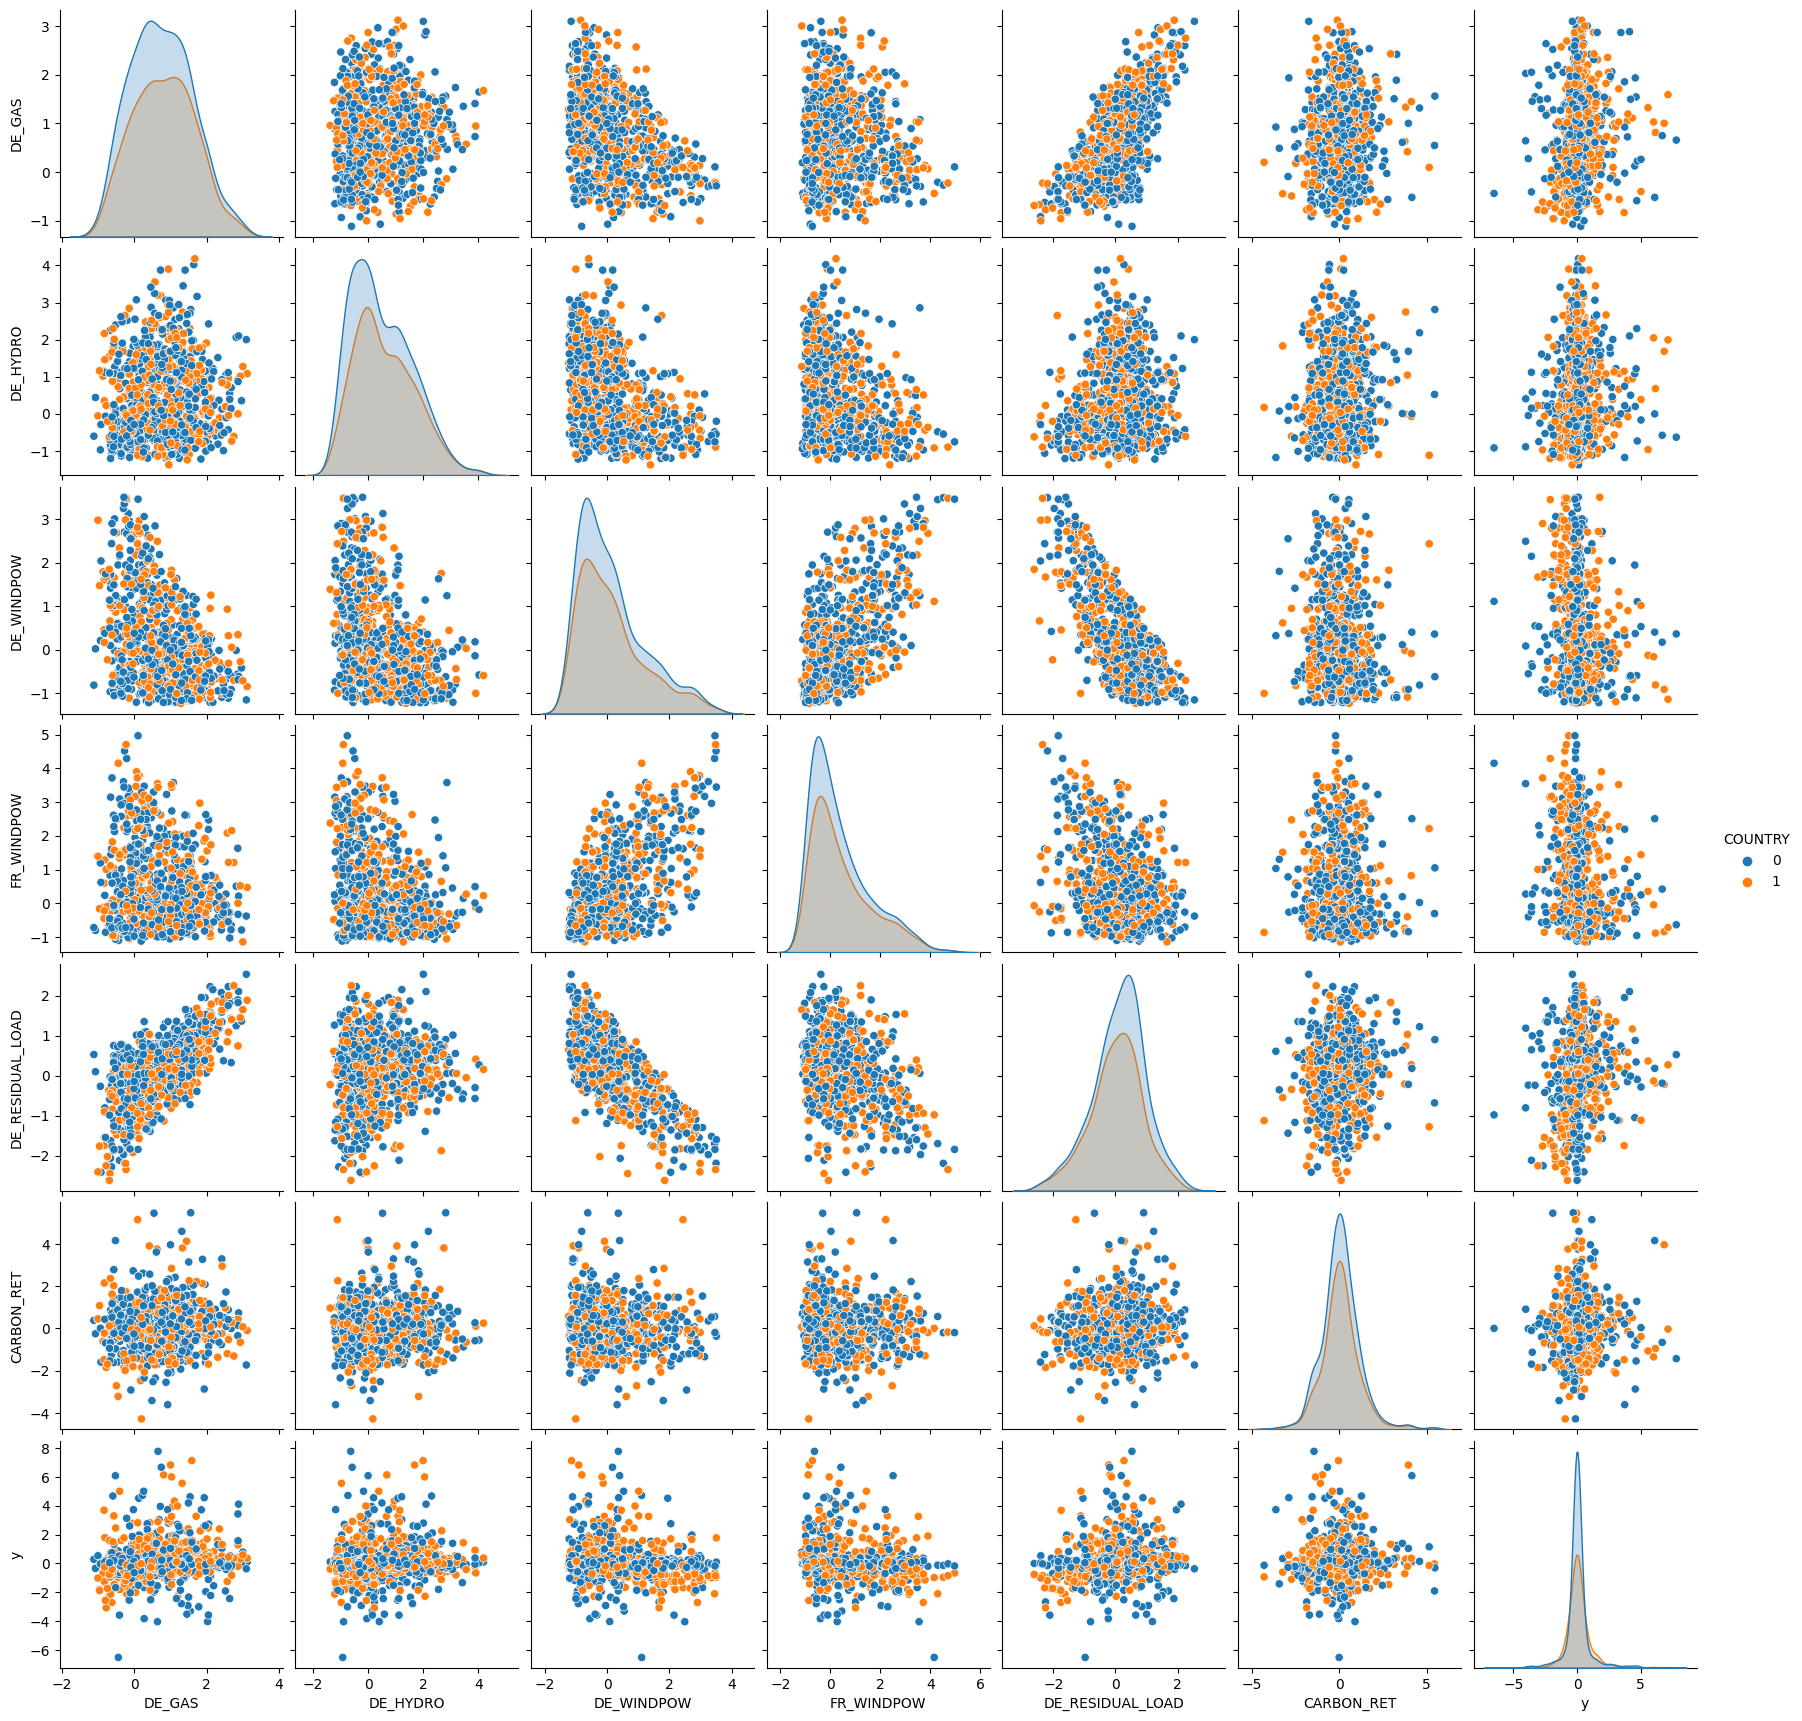

In [109]:
sns.pairplot(x_train[['COUNTRY','DE_GAS',
 'DE_HYDRO',
 'DE_WINDPOW',
 'FR_WINDPOW',
 'DE_RESIDUAL_LOAD',
 'CARBON_RET', 'y']],hue='COUNTRY')

In [88]:
features = corr.columns[(np.sum([corr[abs(corr)>=0.1].fillna(0)!=0],axis=1) > np.sum([corr[abs(corr)>=0.1].fillna(0)!=0],axis=1).mean())[0]]

In [106]:
(np.sum([corr[abs(corr)>=0.1].fillna(0)!=0],axis=1) > np.sum([corr[abs(corr)>=0.1].fillna(0)!=0],axis=1).mean())[0]

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True, False, False, False, False, False, False])

In [122]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized')
pca.fit(df_y_train)
print(pca.feature_names_in_)

['TARGET']


In [89]:
x_train[features]

,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,...,FR_NUCLEAR,DE_SOLAR,FR_SOLAR,DE_WINDPOW,FR_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,FR_RESIDUAL_LOAD,DE_WIND,FR_WIND
ID,,,,,,,,,,,,,,,,,,,,,
1054,0.210099,-0.427458,-0.606523,0.606523,0.000000,0.692860,0.000000,-0.692860,0.441238,-0.213766,...,-0.190463,0.101766,1.248911,-0.573370,-0.269460,0.870344,0.626666,-0.444661,-0.790823,-0.283160
2049,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,1.130838,0.174773,0.426940,...,-2.185961,1.987428,3.237380,-0.035514,-0.107350,-0.194308,-0.395469,-1.183194,1.522331,0.828412
1924,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,1.682587,2.351913,2.122241,...,0.735137,-1.115583,-0.371039,-0.298755,-0.141239,0.428272,1.336625,1.947273,0.431134,0.487608
297,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,-0.563230,0.487818,0.194659,...,-1.589554,1.751523,0.562944,-0.010090,0.366885,-2.330557,-1.191889,-0.976974,-0.499409,-0.236249
1101,0.143807,-0.617038,-0.924990,0.924990,0.000000,0.990324,0.000000,-0.990324,0.238693,-0.240862,...,0.176935,0.693543,0.723587,-0.774941,-0.564498,0.691040,0.571613,-0.526267,-1.088158,-1.011560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,1.529204,1.106682,-1.855327,1.855327,-0.218658,1.450426,0.218658,-1.450426,1.810665,1.388269,...,0.712492,-1.325306,-0.855249,-0.057214,2.968535,0.790548,1.547782,0.509514,0.000000,0.000000
1674,1.618582,1.752840,0.611392,-0.611392,0.449153,-0.152146,-0.449153,0.152146,1.972779,1.558300,...,0.926279,-1.222781,-0.923261,0.198857,0.789618,0.917482,1.358927,1.666252,0.000000,0.000000
748,0.856399,0.489199,-0.255778,0.255778,-1.531544,-0.829568,1.531544,0.829568,2.108764,1.866399,...,-0.964588,-0.626731,0.196789,-0.981718,0.303324,0.211422,1.493870,0.358120,-0.594595,0.894011


## Correlation between the price of electricity and return of the future on carbon emissions.

_(Here is an example of data exploration + interpretation you can perform to understand your features)._

Very naively, one might think that there is a correlation between the variation of day-ahead electricty price and the variations of the future on carbon emissions. To make sure, compute the correlation between the future on carbon returns and price electricity variations. Then plot the cumulative variations of electricty price and future on carbon emissions through time.

To compute the correlation : 
- Using [**Spearman Correlation**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html), compute the spearman rank and p-value between **df_y_train** and feature **CARBON_RET**.
- Make a scatter plot between **df_y_train** and feature **CARBON_RET**.

To compute the cumulated variations : 
- Filter the training set on "France" only and sort values by "DAY_ID". Assign the results to **df_france**.
- Get the associated variations of electricity by filtering y_train on df_france index. Assign the result to **y_france**.
- Plot the cumulated variations of "FR_CONSUMPTION" (y-axis) through time (x-axis) using pandas method cumsum().
- Plot the cumulated variations of "y_france" (y-axis) through time (x-axis) using pandas method cumsum().

In [21]:
df_train["CUM_CONSUMPTION"] = df_train.DE_CONSUMPTION + df_train.FR_CONSUMPTION
df_train["CUM_WINDPOW"] = df_train.DE_WINDPOW + df_train.FR_WINDPOW

df_test["CUM_CONSUMPTION"] = df_test.DE_CONSUMPTION + df_test.FR_CONSUMPTION
df_test["CUM_WINDPOW"] = df_test.DE_WINDPOW + df_test.FR_WINDPOW


In [136]:

l=[]
for i in range(2,len(df_train.columns)):
    # Compute the correlation between the two variables.
    spearman_electricty_carbon_ret = spearmanr(df_y_train,df_train[df_train.columns[i]])
    spearman_corr = spearman_electricty_carbon_ret.correlation
    spearman_p_value = spearman_electricty_carbon_ret.pvalue
    print("Spearman rank between electricity and %s : %.4f with p-value : %s" % (df_train.columns[i],spearman_corr, spearman_p_value))
    if abs(spearman_corr) >0.1:
        l.append(df_train.columns[i])

Spearman rank between electricity and DE_CONSUMPTION : -0.0636 with p-value : 0.013918108718563445
Spearman rank between electricity and FR_CONSUMPTION : -0.0272 with p-value : 0.29267354795238726
Spearman rank between electricity and DE_FR_EXCHANGE : nan with p-value : nan
Spearman rank between electricity and FR_DE_EXCHANGE : nan with p-value : nan
Spearman rank between electricity and DE_NET_EXPORT : nan with p-value : nan
Spearman rank between electricity and FR_NET_EXPORT : nan with p-value : nan
Spearman rank between electricity and DE_NET_IMPORT : nan with p-value : nan
Spearman rank between electricity and FR_NET_IMPORT : nan with p-value : nan
Spearman rank between electricity and DE_GAS : 0.1299 with p-value : 4.697091644763738e-07
Spearman rank between electricity and FR_GAS : 0.0163 with p-value : 0.5281433005722599
Spearman rank between electricity and DE_COAL : 0.0724 with p-value : 0.0051265279369900295
Spearman rank between electricity and FR_COAL : 0.0485 with p-value 

Spearman rank between electricity and carbon return : 0.1044 with p-value : 5.300091806233588e-05


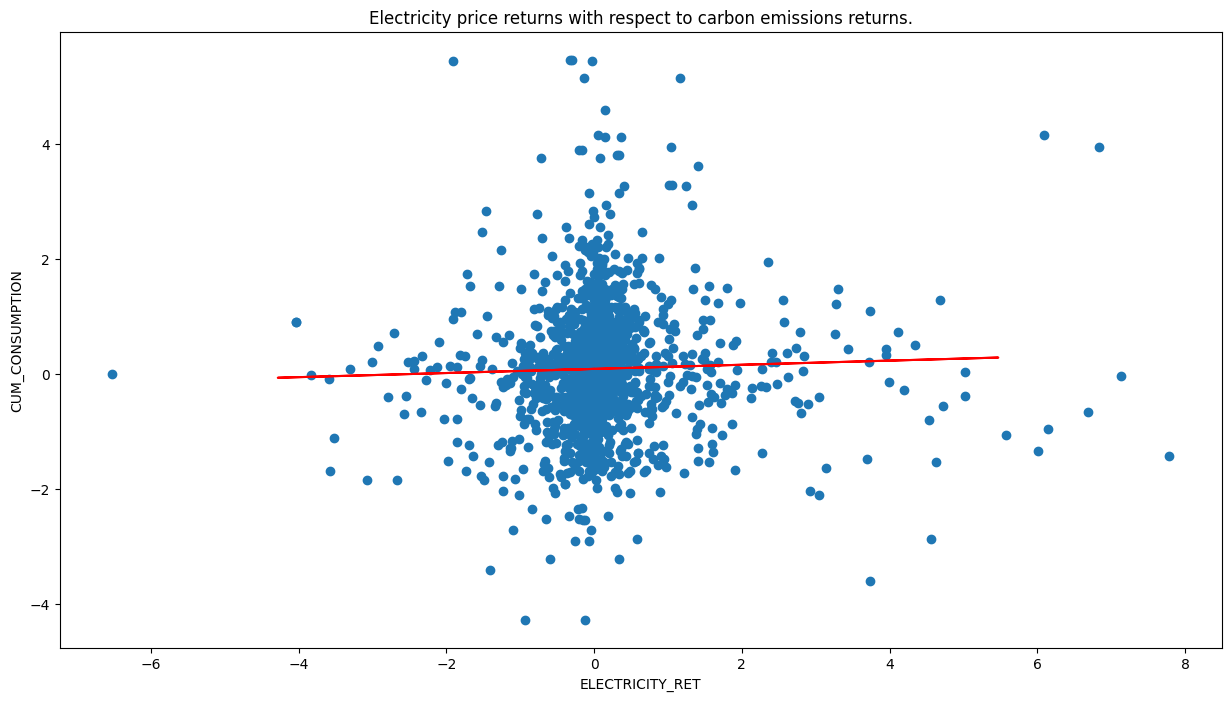

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


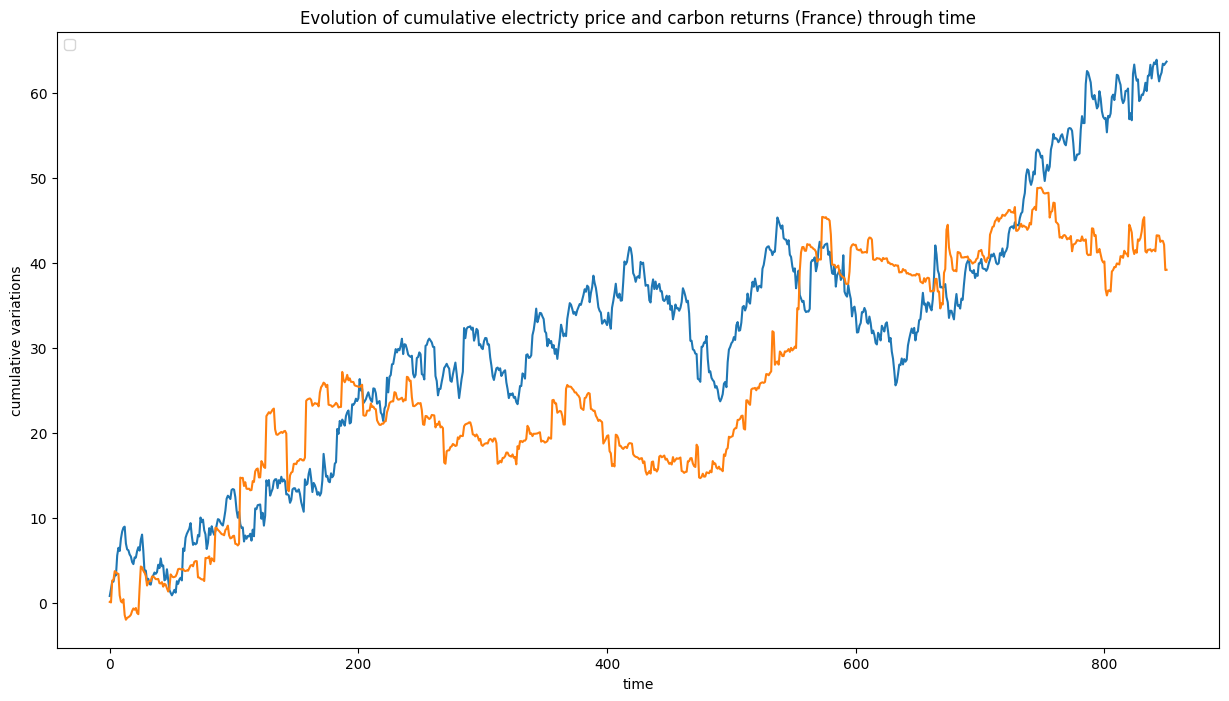

In [14]:
from scipy.stats import spearmanr

factor = df_train.CARBON_RET

# Compute the correlation between the two variables.
spearman_electricty_carbon_ret = spearmanr(df_y_train,factor)
spearman_corr = spearman_electricty_carbon_ret.correlation
spearman_p_value = spearman_electricty_carbon_ret.pvalue
print("Spearman rank between electricity and carbon return : %.4f with p-value : %s" % (spearman_corr, spearman_p_value))

# scatter plot
plt.figure(figsize=[15, 8])
plt.scatter(df_y_train,factor)
m, b = np.polyfit(df_train["CARBON_RET"], df_y_train, 1)
plt.plot(df_train["CARBON_RET"], m*df_train["CARBON_RET"]+b, color="red")  #add linear regression line to scatterplot 
plt.xlabel("ELECTRICITY_RET")
plt.ylabel("CUM_CONSUMPTION")
plt.title("Electricity price returns with respect to carbon emissions returns.")
plt.show()

# plot the cumulated variations
df_france = df_train[df_train.COUNTRY == "FR"].sort_values("DAY_ID").CARBON_RET.reset_index().CARBON_RET.cumsum()
y_france = df_y_train.filter(df_train[df_train.COUNTRY == "FR"].sort_values("DAY_ID").index).reset_index().TARGET.cumsum()

plt.figure(figsize=[15, 8])
plt.plot(df_france)
plt.plot(y_france)
plt.xlabel("time")
plt.ylabel("cumulative variations")
plt.title("Evolution of cumulative electricty price and carbon returns (France) through time")
plt.legend(loc="upper left")
plt.show()

In [151]:
check_test(round(abs(spearman_corr), 3), 0.104, "wrong correlation between mean_abs_ret and target.")

1 test passed.


## Take a look on variable DAY_ID

Sort the values DAY_ID in the training and the test set and take a look on its distribution.


<span style="color:green">**=> Exemple : your interpretation may go here.** </span>.

In [152]:
print(df_train.sort_values("DAY_ID").DAY_ID.head(20))

print(df_test.sort_values("DAY_ID").DAY_ID.head(20))

ID
1057     0
1179     1
1327     2
111      2
2016     3
800      3
2047     5
831      5
1995     7
779      7
841      8
2057     8
496     11
1712    11
871     12
2087    12
1736    14
520     14
1106    15
1993    16
Name: DAY_ID, dtype: int64
ID
1626     4
410      4
1778     6
562      6
1966     9
750      9
1125    10
802     13
2018    13
1087    17
1154    19
504     24
1720    24
2028    30
812     30
569     32
1785    32
1585    33
369     33
1112    35
Name: DAY_ID, dtype: int64


In [27]:
import copy
x = copy.deepcopy(df_train)
x.merge(df_y_train,how='left',left_index=True,right_index=True)



,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,CUM_CONSUMPTION,CUM_WINDPOW,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,-0.692860,...,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445,-0.217359,-0.842831,0.028313
2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,1.130838,...,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365,-1.025852,-0.142864,-0.112516
1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,1.682587,...,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952,3.373700,-0.439994,-0.180840
297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,-0.563230,...,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948,-1.832522,0.356795,-0.260356
1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,-0.990324,...,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378,-0.473230,-1.339439,-0.071733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,809,DE,1.529204,1.106682,-1.855327,1.855327,-0.218658,1.450426,0.218658,-1.450426,...,NaN,NaN,NaN,NaN,0.876984,0.819520,1.320373,2.635886,2.911322,-0.172597
1674,887,FR,1.618582,1.752840,0.611392,-0.611392,0.449153,-0.152146,-0.449153,0.152146,...,NaN,NaN,NaN,NaN,0.932633,-0.085690,0.356356,3.371422,0.988474,-0.063546
748,1083,DE,0.856399,0.489199,-0.255778,0.255778,-1.531544,-0.829568,1.531544,0.829568,...,-0.594595,0.894011,0.256338,0.402316,-1.112899,-0.237835,0.067152,1.345598,-0.678394,0.151797


In [30]:
df_y_train

ID
1054    0.028313
2049   -0.112516
1924   -0.180840
297    -0.260356
1101   -0.071733
          ...   
459    -0.172597
1674   -0.063546
748     0.151797
1454   -0.640917
359    -0.252764
Name: TARGET, Length: 1494, dtype: float64

## Description of missing values

Let's take a look on missing values. For each feature in the train and test datasets, compute and display the number of missing values per column (you can use the pandas method **.isnull()**).

- Count the total number of missing values for the training set and the test set (for all the features). Assign the total number of missing values respectively to **n_missing_train** and **n_missing_test**.

In [153]:
for col in df_train.columns:
    n_missing_train = df_train[col].isnull().sum()
    n_missing_test = df_test[col].isnull().sum()
    print("Column %s : missing in train set = %s / %s. In test set %s / %s" % (col, n_missing_train, df_train.shape[0], n_missing_test, df_test.shape[0]))


Column DAY_ID : missing in train set = 0 / 1494. In test set 0 / 654
Column COUNTRY : missing in train set = 0 / 1494. In test set 0 / 654
Column DE_CONSUMPTION : missing in train set = 0 / 1494. In test set 0 / 654
Column FR_CONSUMPTION : missing in train set = 0 / 1494. In test set 0 / 654
Column DE_FR_EXCHANGE : missing in train set = 25 / 1494. In test set 9 / 654
Column FR_DE_EXCHANGE : missing in train set = 25 / 1494. In test set 9 / 654
Column DE_NET_EXPORT : missing in train set = 124 / 1494. In test set 47 / 654
Column FR_NET_EXPORT : missing in train set = 70 / 1494. In test set 24 / 654
Column DE_NET_IMPORT : missing in train set = 124 / 1494. In test set 47 / 654
Column FR_NET_IMPORT : missing in train set = 70 / 1494. In test set 24 / 654
Column DE_GAS : missing in train set = 0 / 1494. In test set 0 / 654
Column FR_GAS : missing in train set = 0 / 1494. In test set 0 / 654
Column DE_COAL : missing in train set = 0 / 1494. In test set 0 / 654
Column FR_COAL : missing in t

## Other things you can try

There are a lot ot experiments you can try to explore data. If you lack in ideas, here are some you can try :

- Understand features using statistical measures (mean, variance, std...) and visual charts.
- Try to understand the underlying relationship between the input features and the label. Make interpretations ! 
- Search for correlations between features and label.
- Investigate any missing values and outliers.
- ...

However, feel completly free to provide your own analysis, exploration, interpretations and conclusions. Be creative !

# Step 2 - Features engineering and selection

According to the conclusions you get from step 1 exploration, process your data (features engineering, features selection, dimensionality reduction...). Feel free to create several different datasets if you want to explore different kind of dataframes.

## Deal with missing values

During step 1, we have observed multiple missing values. We have to clean it before using a machine learning algorithm. As an example, we will simply impute the missing values with the mean of the features. However, you are free to choose the validation procedure. but you have to justify your process.

<span style="color:green">**=> Exemple : your interpretation may go here.** </span>.

In [15]:
# For each column, fill with defaut value 0.
for col in df_train.columns.tolist():
    df_train[col] = df_train[col].fillna(0)
    df_test[col] =  df_test[col].fillna(0)

In [16]:
# check we don't have any missing values anymore.
check_test(df_train.isnull().sum().sum(), 0, "incorrect number of missing values.")
check_test(df_test.isnull().sum().sum(), 0, "incorrect number of missing values.")

1 test passed.
1 test passed.


## Create a new feature renewable

_Here is an exemple of features engineering._

As you can see in the dataset, energy production variables (x_GAS, x_COAL, x_HYDRO...) give the daily variation of each production method. However, it doesn't take into account the weight of the energy in the electric mix. For example in France, wind power produces around 6,3% of the energy while nuclear power weights 70% of the energy mix.

As the day-ahead market is dependant of the renewable energy production (which itself depends of the meteo), compute new variables **FR_RENEWABLE** and **DE_RENEWABLE** as the weighted variation of **wind** production and **solar** production. 

As a first approximation, you can find the weight of the two energies on Wikipedia : 
- France : https://en.wikipedia.org/wiki/Electricity_sector_in_France
- Germany : https://en.wikipedia.org/wiki/Electricity_sector_in_Germany


<span style="color:green">**=> Exemple : your interpretation may go here.** </span>.

In [52]:
l


['DE_GAS',
 'DE_HYDRO',
 'DE_WINDPOW',
 'FR_WINDPOW',
 'DE_RESIDUAL_LOAD',
 'CARBON_RET',
 'CUM_WINDPOW']

In [18]:
# compute feature FR_RENEWABLE and DE_RENEWABLE
df_train["FR_RENEWABLE"] = df_train.FR_SOLAR*0.0216 + df_train.FR_WINDPOW*0.0634
df_test["FR_RENEWABLE"] = df_test.FR_SOLAR*0.0216 + df_test.FR_WINDPOW*0.0634

df_train["DE_RENEWABLE"] = df_train.DE_SOLAR*0.09 + df_train.DE_WINDPOW*0.204
df_test["DE_RENEWABLE"] = df_test.DE_SOLAR*0.09 + df_test.DE_WINDPOW*0.204

df_train["FR_total_energy_prod"] = df_train.FR_NUCLEAR *0.7058 + df_train.FR_HYDRO*0.1116 + df_train.FR_GAS*0.0718 + df_train.FR_SOLAR*0.0216 + df_train.FR_WINDPOW*0.0634
df_test["FR_total_energy_prod"] =  df_test.FR_NUCLEAR *0.7058 + df_test.FR_HYDRO*0.1116 + df_test.FR_GAS*0.0718 + df_test.FR_SOLAR*0.0216 + df_test.FR_WINDPOW*0.0634

df_train["DE_total_energy_prod"] = df_train.DE_NUCLEAR *0.117 + df_train.DE_COAL*0.234 + df_train.DE_LIGNITE*0.234 + df_train.DE_SOLAR*0.09 + df_train.DE_WINDPOW*0.204
df_test["DE_total_energy_prod"] = df_test.DE_NUCLEAR *0.117 + df_test.DE_COAL*0.234 + df_test.DE_LIGNITE*0.234 + df_test.DE_SOLAR*0.09 + df_test.DE_WINDPOW*0.204



# Compute the correlation (FR)
spearman_wind_fr = spearmanr(df_train["FR_WINDPOW"], df_y_train)
spearman_solar_fr = spearmanr(df_train["FR_SOLAR"], df_y_train)
spearman_renew_fr = spearmanr(df_train["FR_RENEWABLE"], df_y_train)
print("\nSpearman rank between electricity and wind (FR) : %.4f with p-value : %s" % (spearman_wind_fr.correlation, spearman_wind_fr.pvalue))
print("Spearman rank between electricity and solar (FR) : %.4f with p-value : %s" % (spearman_solar_fr.correlation, spearman_solar_fr.pvalue))
print("Spearman rank between electricity and renew (FR) : %.4f with p-value : %s" % (spearman_renew_fr.correlation, spearman_renew_fr.pvalue))
print(spearmanr(df_train["FR_total_energy_prod"],df_y_train))

# Compute the correlation (DE)
spearman_wind_de = spearmanr(df_train["DE_WINDPOW"], df_y_train)
spearman_solar_de = spearmanr(df_train["DE_SOLAR"], df_y_train)
spearman_renew_de = spearmanr(df_train["DE_RENEWABLE"], df_y_train)
print("\nSpearman rank between electricity and wind (DE) : %.4f with p-value : %s" % (spearman_wind_de.correlation, spearman_wind_de.pvalue))
print("Spearman rank between electricity and solar (DE) : %.4f with p-value : %s" % (spearman_solar_de.correlation, spearman_solar_de.pvalue))
print("Spearman rank between electricity and renew (DE) : %.4f with p-value : %s" % (spearman_renew_de.correlation, spearman_renew_de.pvalue))
print(spearmanr(df_train["DE_total_energy_prod"],df_y_train))


Spearman rank between electricity and wind (FR) : -0.1556 with p-value : 1.4955240770043354e-09
Spearman rank between electricity and solar (FR) : 0.0288 with p-value : 0.2652900064461168
Spearman rank between electricity and renew (FR) : -0.1658 with p-value : 1.1325372341246425e-10
SpearmanrResult(correlation=-0.005822080639202161, pvalue=0.8220957072465084)

Spearman rank between electricity and wind (DE) : -0.1857 with p-value : 4.680683848617166e-13
Spearman rank between electricity and solar (DE) : 0.0327 with p-value : 0.20596361215093578
Spearman rank between electricity and renew (DE) : -0.2007 with p-value : 4.9172864942547936e-15
SpearmanrResult(correlation=-0.04110426991553102, pvalue=0.11226016062747864)


In [61]:
check_test(spearman_renew_fr.correlation < -0.16, True, "not enough correlation between price and FR_RENEW")
check_test(spearman_renew_de.correlation < -0.19, True, "not enough correlation between price and DE_RENEW")

1 test passed.
1 test passed.


## Features selection

Before running a machine learning algorithm, we have to select the features relevant with our modelization.
- In this section, select a first set of features you want to use in your machine learning algorithm. Assign this list in the variable **features**.
- Make sure that you have removed the feature **ID** from this list as it is not relevant for the model.

Note : You can access a dataframe columns using the dataframe's attribute **.columns**

<span style="color:green">**=> Exemple : your interpretation may go here.** </span>.

In [22]:
df_test.columns

Index(['DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET',
       'FR_RENEWABLE', 'DE_RENEWABLE', 'FR_total_energy_prod',
       'DE_total_energy_prod', 'CUM_CONSUMPTION', 'CUM_WINDPOW'],
      dtype='object')

In [31]:
df_features = df_train[['DE_GAS', 'DE_HYDRO', 'DE_WINDPOW',
                    'FR_WINDPOW', 'DE_RESIDUAL_LOAD', 'CARBON_RET',
                    'CUM_WINDPOW','FR_RENEWABLE', 'DE_RENEWABLE',
                    'FR_total_energy_prod','DE_total_energy_prod']]

In [158]:
check_test("ID" not in features, True, "error : column ID still in the features.")

1 test passed.


## Other things you can try

There are a lot ot experiments you can try to process your data. If you lack in ideas, here are some you can try :

- Create new insights from the raw data. 
- Perform features selection / dimensionality reduction to enhance the features.
- ...

Once again, feel completly free to provide your own process, interpretations and conclusions...

# Step 3 - Machine learning algorithms experiments

In this part, you will test different machine learning algorithms and configurations. It is your sandbox before running the final machine learning model. You will also have to evaluate your results and interpret it.

## Validation procedure

In this section, we will split our dataset into a train set and a validation set. As the dataset is very small, the cross-validation seems more approprite than train-test split. We will perform it in the next cells.

- Select the list of features and assign it to **x_train_val** and **x_test**.


In [32]:
x = df_train.replace('FR',0)
x = x.replace('DE',1)
x_train_val = df_features
y_train_val = df_y_train
x = df_test.replace('FR',0)
x = x.replace('DE',1)
x_test = x

In [175]:
x_train_val

,DE_GAS,DE_HYDRO,DE_WINDPOW,FR_WINDPOW,DE_RESIDUAL_LOAD,CARBON_RET,CUM_WINDPOW,FR_RENEWABLE,DE_RENEWABLE
ID,,,,,,,,,
1054,0.441238,2.209047,-0.573370,-0.269460,0.626666,-0.002445,-0.842831,0.009893,-0.107809
2049,0.174773,0.187964,-0.035514,-0.107350,-0.395469,-0.490365,-0.142864,0.063121,0.171624
1924,2.351913,-0.108578,-0.298755,-0.141239,1.336625,0.204952,-0.439994,-0.016969,-0.161348
297,0.487818,-0.368417,-0.010090,0.366885,-1.191889,1.073948,0.356795,0.035420,0.155579
1101,0.238693,-0.230179,-0.774941,-0.564498,0.571613,2.614378,-1.339439,-0.020160,-0.095669
...,...,...,...,...,...,...,...,...,...
459,1.810665,-0.470809,-0.057214,2.968535,1.547782,1.320373,2.911322,0.169732,-0.130949
1674,1.972779,-0.341147,0.198857,0.789618,1.358927,0.356356,0.988474,0.030119,-0.069484
748,2.108764,0.037892,-0.981718,0.303324,1.493870,0.067152,-0.678394,0.023481,-0.256676


## Vanilla linear regression

Let us test a first linear regression model with default parameters and all the features.

- Train a simple linear regression and assign the resulting model to the variable **model**.
- Use the model to make predictions on the train set samples. Assign the resulting serie to **pred_train**.
- Use the model to make predictions on the validation set using cross-validation. Assign the resulting serie to **pred_val**.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

# linear regression

clf = LinearRegression()
model = clf.fit(x_train_val, y_train_val)
pred_train = model.predict(x_train_val)
pred_train = pd.Series(pred_train, index=y_train_val.index)

pred_val = cross_val_predict(clf, x_train_val, y_train_val)
pred_val = pd.Series(pred_val, index=y_train_val.index)




## Evaluate the results of the vanilla linear regression

For this use-case, the metrics is the **Spearman Correlation Rank**. Scipy provides an implementation of this metrics [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html). According to you, are you in an underfitting or an overfitting situation ?

In [34]:
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error

# Compute Spearman Rank Correlation
spearman_train = spearmanr(y_train_val, pred_train)
spearman_val = spearmanr(y_train_val, pred_val)
print("Spearman rank score on train dataset : %.4f with p-value : %s" % (spearman_train.correlation, spearman_train.pvalue))
print("Spearman rank score on validation dataset : %.4f with p-value : %s" % (spearman_val.correlation, spearman_val.pvalue))

# Also compute MSE
mse_train = mean_squared_error(pred_train, y_train_val)
mse_val = mean_squared_error(pred_val, y_train_val)
print("MSE score on train dataset : %.4f" % mse_train)
print("MSE score on validation dataset : %.4f" % mse_val)


Spearman rank score on train dataset : 0.2461 with p-value : 4.710134072149758e-22
Spearman rank score on validation dataset : 0.1936 with p-value : 4.408175468768894e-14
MSE score on train dataset : 1.0307
MSE score on validation dataset : 1.0651


Logistic Regression

In [99]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression

# Fit the model on train dataset
clf = LogisticRegression(penalty="none")
model = clf.fit(x_train_val, y_train_val)

# Make predictions on train dataset + validation set (K-fold)
pred_train = model.predict(x_train_val)
pred_val = cross_val_predict(clf, x_train_val, y_train_val, cv=5)



c:\Users\elaar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


ValueError: Unknown label type: 'continuous'

In [100]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge

# Fit the model on train dataset
clf = Ridge(alpha=0.1)
model = clf.fit(x_train_val, y_train_val)

# Make predictions on train dataset + validation set (K-fold)
pred_train = model.predict(x_train_val)
pred_val = cross_val_predict(clf, x_train_val, y_train_val, cv=5)

In [102]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Lasso

# Fit the model on train dataset
clf = Lasso(alpha=1)
model = clf.fit(x_train_val, y_train_val)

# Make predictions on train dataset + validation set (K-fold)
pred_train = model.predict(x_train_val)
pred_val = cross_val_predict(clf, x_train_val, y_train_val, cv=5)

In [103]:
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error

# Compute Spearman Rank Correlation
spearman_train = spearmanr(y_train_val, pred_train)
spearman_val = spearmanr(y_train_val, pred_val)
print("Spearman rank score on train dataset : %.4f with p-value : %s" % (spearman_train.correlation, spearman_train.pvalue))
print("Spearman rank score on validation dataset : %.4f with p-value : %s" % (spearman_val.correlation, spearman_val.pvalue))

# Also compute MSE
mse_train = mean_squared_error(pred_train, y_train_val)
mse_val = mean_squared_error(pred_val, y_train_val)
print("MSE score on train dataset : %.4f" % mse_train)
print("MSE score on validation dataset : %.4f" % mse_val)


Spearman rank score on train dataset : nan with p-value : nan
Spearman rank score on validation dataset : -0.0411 with p-value : 0.11216886672853861
MSE score on train dataset : 1.0696
MSE score on validation dataset : 1.0708


c:\Users\elaar\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


## Why is this modeling approach flawed ?

We are adressing a complex use-case combining **Spearman correlation optimisation** and **overfitting** issues due to the very small number of observations. Features engineering and selection may be the keys to solve this challenge.

## Other things you can try

Once again, there are a lot ot experiments you can try. If you lack in ideas, here are some you can try :

- Test multiple machine learning algorithms we have seen during the lectures.
- Test different combinations of hyperparameters.
- Test different sets of features. Use your own features.
- Interpret your results with regards to the underfitting-overfitting tradeoff.
- Look at residuals. Plot learning curves.
- Search for the optimal set of hyperparameters.
- Try to optimize the Spearman correlation rank instead of the mean square error.
- Provide interpretations.
- ...

It is good to test different machine learning algorithms and configurations. Some algorithms are more suited than others depending of use-case. Moreover, learning is really sensitive to hyperparameters you provide. Exploring your results by learning curves will help you diagnose your models. Time to apply what you have learned during lectures! 

# Step 4 - Final run

According to previous steps results and your own interpretation, run your best machine learning algorithm and make  predictions on the test set. Then export your results in and make submission on the ENS data challenge platform.

## Run your best model and make prediction on test set

Fit the best model you have obtained during part 3 on the whole training set. Then compute the predictions for the test set and assign the resut to **pred_test**

In [36]:
x_test = df_test[['DE_GAS', 'DE_HYDRO', 'DE_WINDPOW',
                    'FR_WINDPOW', 'DE_RESIDUAL_LOAD', 'CARBON_RET',
                    'CUM_WINDPOW','FR_RENEWABLE', 'DE_RENEWABLE',
                    'FR_total_energy_prod','DE_total_energy_prod']]

In [37]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
model = clf.fit(x_train_val, y_train_val)
pred_train = model.predict(x_train_val)
pred_train = pd.Series(pred_train, index=y_train_val.index)
pred_val = cross_val_predict(clf, x_train_val, y_train_val)
pred_val = pd.Series(pred_val, index=y_train_val.index)

pred_test = model.predict(x_test)
pred_test = pd.Series(pred_test, index=x_test.index)

In [38]:
check_test(pred_test.shape, (654,), "wrong shape for pred test")

1 test passed.


## Evaluate best model

Our best machine learning algorithm yields the following results : 

In [39]:
# Compute Spearman Rank Correlation
spearman_train = spearmanr(y_train_val, pred_train)
spearman_val = spearmanr(y_train_val, pred_val)
print("Spearman rank score on train dataset : %.4f with p-value : %s" % (spearman_train.correlation, spearman_train.pvalue))
print("Spearman rank score on validation dataset : %.4f with p-value : %s" % (spearman_val.correlation, spearman_val.pvalue))

# Also compute MSE
mse_train = mean_squared_error(pred_train, y_train_val)
mse_val = mean_squared_error(pred_val, y_train_val)
print("MSE score on train dataset : %.4f" % mse_train)
print("MSE score on validation dataset : %.4f" % mse_val)

Spearman rank score on train dataset : 0.2461 with p-value : 4.710134072149758e-22
Spearman rank score on validation dataset : 0.1936 with p-value : 4.408175468768894e-14
MSE score on train dataset : 1.0307
MSE score on validation dataset : 1.0651


## Interpretation

<span style="color:green">**=> Exemple : your interpretation may go here.** </span>.

## Export submission to ENS data challenge

You can export your predictions as a submission file using function export_ens() defined earlier in the notebook. Then go on ENS data challenge competition page and submit your predictions. Your can observe your performance on the leaderboard page.

In [40]:
df_submit = export_ens(df_test, pred_test, True, "../results/my_3rd_submission.csv")

## Conclusion

You can write your work conclusion in this cell.

## Other things you can try

If you lack in ideas, here are some you can try :

- Evaluate the final model on train, validation and test set. Diagnose your model results.
- Take a look on features importances.
- Give conclusion;
- ...

Feel free to provide your own interpretations and justifications. Good luck !